In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from skimage import measure
from mayavi import mlab

Visualisation initial

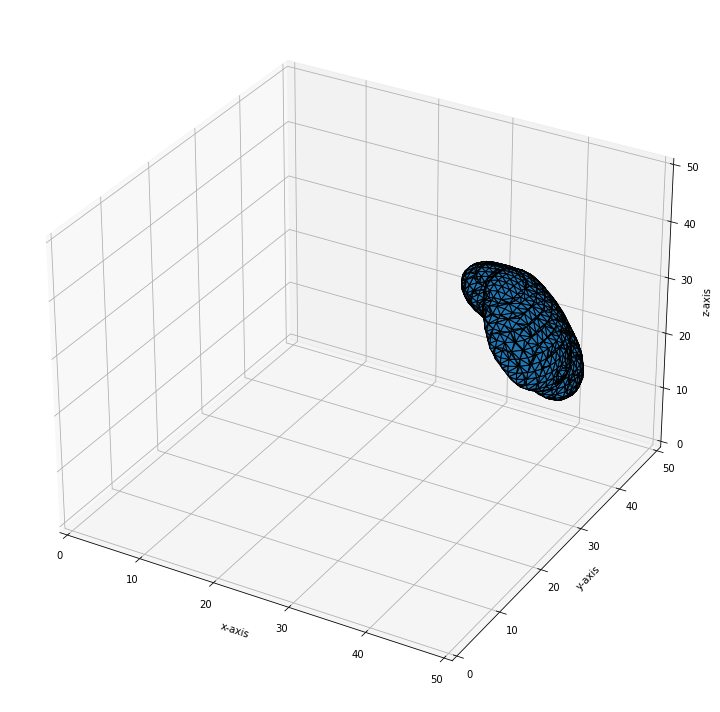

In [5]:
# Display resulting triangular mesh using Matplotlib. This can also be done
# with mayavi (see skimage.measure.marching_cubes_lewiner docstring).
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Fancy indexing: `verts[faces]` to generate a collection of triangles
mesh = Poly3DCollection(verts[faces])
mesh.set_edgecolor('k')
ax.add_collection3d(mesh)

ax.set_xlabel("x-axis")
ax.set_ylabel("y-axis")
ax.set_zlabel("z-axis")

ax.set_xlim(0, 50)  # a = 6 (times two for 2nd ellipsoid)
ax.set_ylim(0, 50)  # b = 10
ax.set_zlim(0, 50)  # c = 16

plt.tight_layout()
plt.show()

Visualisation après rescale par rapport à la plus grande longueur

In [3]:
points = pd.read_csv("D:\zaradata\HCT\HCT1\HCT2_3nccacbNZ15.csv")

values = points.T

kde=stats.gaussian_kde(values)

xmin, ymin, zmin = points.min(axis=0)
xmax, ymax, zmax = points.max(axis=0)
xi, yi, zi = np.mgrid[xmin-(((ymax-ymin)-(xmax-xmin))/2):xmax+(((ymax-ymin)-(xmax-xmin))/2):50j, ymin:ymax:50j, zmin-(((ymax-ymin)-(zmax-zmin)))/2:zmax+(((ymax-ymin)-(zmax-zmin))/2):50j]

coords = np.vstack([item.ravel() for item in [xi, yi, zi]])
density = kde(coords).reshape(xi.shape)

data=(density - (density.max()/2))*-1 # -1 c'est pour inverser la map de densité (KDE fait un "négatif" de ce que marching cube cherche)

p=0.5
verts, faces, normals, values = measure.marching_cubes(data, data.max()*p) 
# remplacer p par une valeur entre 0 et 1 pour avoir isocontour correspondant ex: 0.5 -> 50 % des points, 0.01 -> 1 % des points

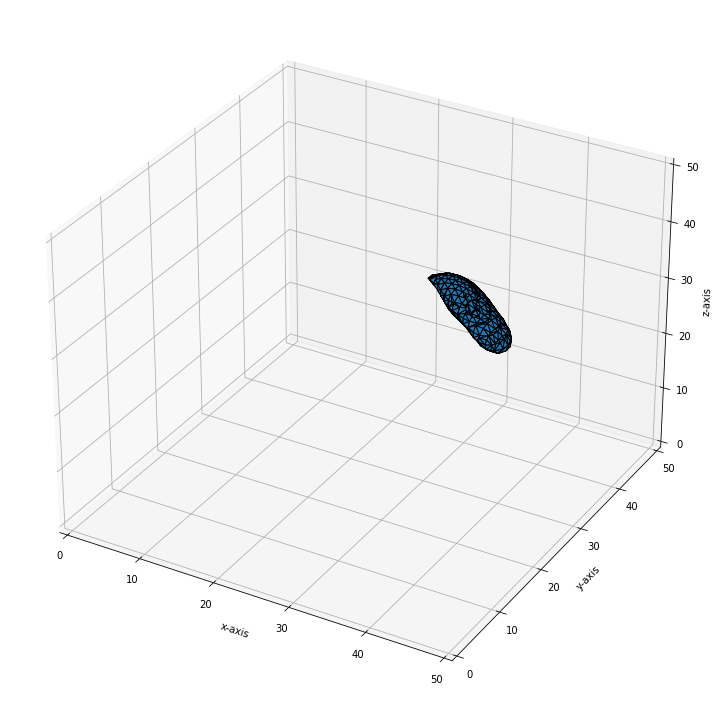

In [4]:
# Display resulting triangular mesh using Matplotlib. This can also be done
# with mayavi (see skimage.measure.marching_cubes_lewiner docstring).
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Fancy indexing: `verts[faces]` to generate a collection of triangles
mesh = Poly3DCollection(verts[faces])
mesh.set_edgecolor('k')
ax.add_collection3d(mesh)

ax.set_xlabel("x-axis")
ax.set_ylabel("y-axis")
ax.set_zlabel("z-axis")

ax.set_xlim(0, 50)  # a = 6 (times two for 2nd ellipsoid)
ax.set_ylim(0, 50)  # b = 10
ax.set_zlim(0, 50)  # c = 16

plt.tight_layout()
plt.show()

Visualisation après mis à l'échelle sur chaque axe 

<IPython.core.display.Javascript object>


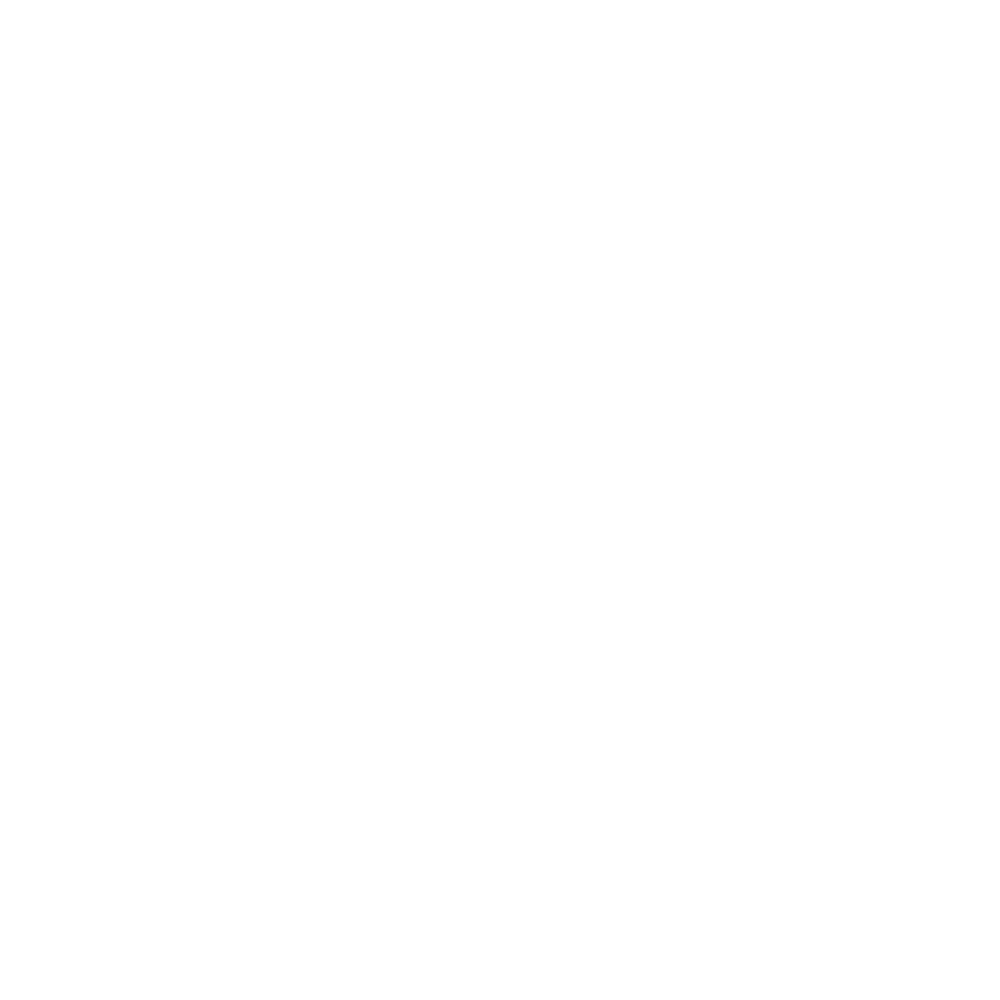

In [93]:
%matplotlib notebook

file="HCT3_3nccacbNZ69.csv"

dir="D:/zaradata/HCT/HCT1/"

filename = dir+"/"+file

points = pd.read_csv(filename)

values = points.T

kde=stats.gaussian_kde(values)

xmin, ymin, zmin = points.min(axis=0)
xmax, ymax, zmax = points.max(axis=0)
xi, yi, zi = np.mgrid[xmin:xmax:50j, ymin:ymax:50j, zmin:zmax:50j]

coords = np.vstack([item.ravel() for item in [xi, yi, zi]])
density = kde(coords).reshape(xi.shape)

data=(density - (density.max()/2))*-1

p=0.9
verts, faces, normals, cubvalues = measure.marching_cubes(data, data.max()*p) 
#verts, faces, normals, values = measure.marching_cubes(data, data.max()*p) 
# remplacer p par une valeur entre 0 et 1 pour avoir isocontour correspondant ex: 0.5 -> 50 % des points, 0.01 -> 1 % des points

rx=50/(xmax-xmin)

ry=50/(ymax-ymin)

rz=50/(zmax-zmin)

vertsmod=np.zeros(verts.shape)
v=0
for v in range(len(verts)):
    vertsmod[v,0]=verts[v,0]/rx
    vertsmod[v,1]=verts[v,1]/ry
    vertsmod[v,2]=verts[v,2]/rz
    
vertstrans=np.zeros(verts.shape)
for v in range(len(verts)):
    vertstrans[v,0]=vertsmod[v,0]+xmin
    vertstrans[v,1]=vertsmod[v,1]+ymin
    vertstrans[v,2]=vertsmod[v,2]+zmin

# Display resulting triangular mesh using Matplotlib. This can also be done
# with mayavi (see skimage.measure.marching_cubes_lewiner docstring).
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Fancy indexing: `verts[faces]` to generate a collection of triangles
meshmod = Poly3DCollection(vertstrans[faces])
meshmod.set_edgecolor('k')
ax.add_collection3d(meshmod)

ax.set_xlabel("x-axis")
ax.set_ylabel("y-axis")
ax.set_zlabel("z-axis")

ax.set_xlim(0, 10+xmax)  # a = 6 (times two for 2nd ellipsoid)
ax.set_ylim(0, 15+ymax)  # b = 10
ax.set_zlim(0, 10+zmax)  # c = 16

#plt.tight_layout()
#plt.show()

mlab.clf()

mlab.triangular_mesh(vertstrans[:,0],vertstrans[:,1],vertstrans[:,2],faces)

mlab.savefig(filename+"_"+str(p)+".obj")